**Import Libraries**

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# **Background**

In today’s fiercely competitive retail landscape, understanding customer behavior is paramount for supermarkets striving to enhance customer satisfaction and drive profitability. With the proliferation of data collection technologies, supermarkets are now equipped with vast repositories of consumer data spanning demographics, purchasing habits, and interactions. In this context, conducting comprehensive data analysis emerges as an indispensable tool for extracting actionable insights that can inform strategic decision-making processes. By delving into the intricate patterns within their datasets, supermarkets can uncover valuable trends, identify areas for optimization, and tailor marketing strategies to meet the evolving needs and preferences of their diverse customer base. This data-driven approach not only fosters operational efficiency but also cultivates a deeper understanding of customer engagement, ultimately positioning supermarkets to thrive in an ever-evolving market landscape. In this study, we embark on a rigorous data analysis journey, leveraging advanced analytical techniques to unlock the potential hidden within our supermarket’s wealth of consumer data.

# **Problem Statement:**

Despite the proliferation of consumer data in the retail sector, supermarkets often grapple with understanding and leveraging this wealth of information to drive strategic decision-making. Our supermarket faces the challenge of optimizing marketing strategies, inventory management, and customer engagement initiatives amidst a dynamic market landscape. Moreover, there is a pressing need to identify key factors influencing customer purchasing behavior and loyalty to enhance overall profitability and competitiveness.

**Questions:**

- What are the primary demographic characteristics of our customer base, and how do they influence purchasing patterns across different product categories?
- Which marketing campaigns have been most effective in driving customer engagement and increasing sales, and how do these campaigns resonate with specific customer segments?
- How can we optimize inventory management practices to ensure adequate stock levels while minimizing overstocking and wastage, thereby improving operational efficiency and profitability?

# **Data**

To answer these questions, we will analyze the following data.

**Supermarket Customers Data Dictionary**

**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month

# **Load Dataset**

In [378]:
df = pd.read_csv('Supermarket Customers.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012 00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014 00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013 00:00,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014 00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014 00:00,94,173,...,5,0,0,0,0,0,0,3,11,0


# **Data Understanding and Cleaning**

In [379]:
print(f'The number of rows and columns in the dataset df is {df.shape}')

df.info()

The number of rows and columns in the dataset df is (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240

Upon inspecting the dataset, we noticed that the Dt_Customer column is incorrectly classified as an integer instead of datetime. We intend to convert it to datetime format later for accurate temporal analysis.

In [380]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


here we are looking at the dataset's description gain a concise statistical summary of the numerical columns in our dataset, aiding in understanding their distributions and identifying potential outliers or anomalies.

In [381]:
df[df['ID'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,0,1985,Graduation,Married,70951.0,0,0,04/05/2013 00:00,66,239,...,1,0,0,0,0,0,0,3,11,0


There is one customer whose ID is 0, this will be removed from the dataset as there is only one.

In [382]:
# Dropping the row with 0 as ID
df.drop(index=214, inplace=True)

In [383]:
df[df['ID'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


The data is succesfully removed.

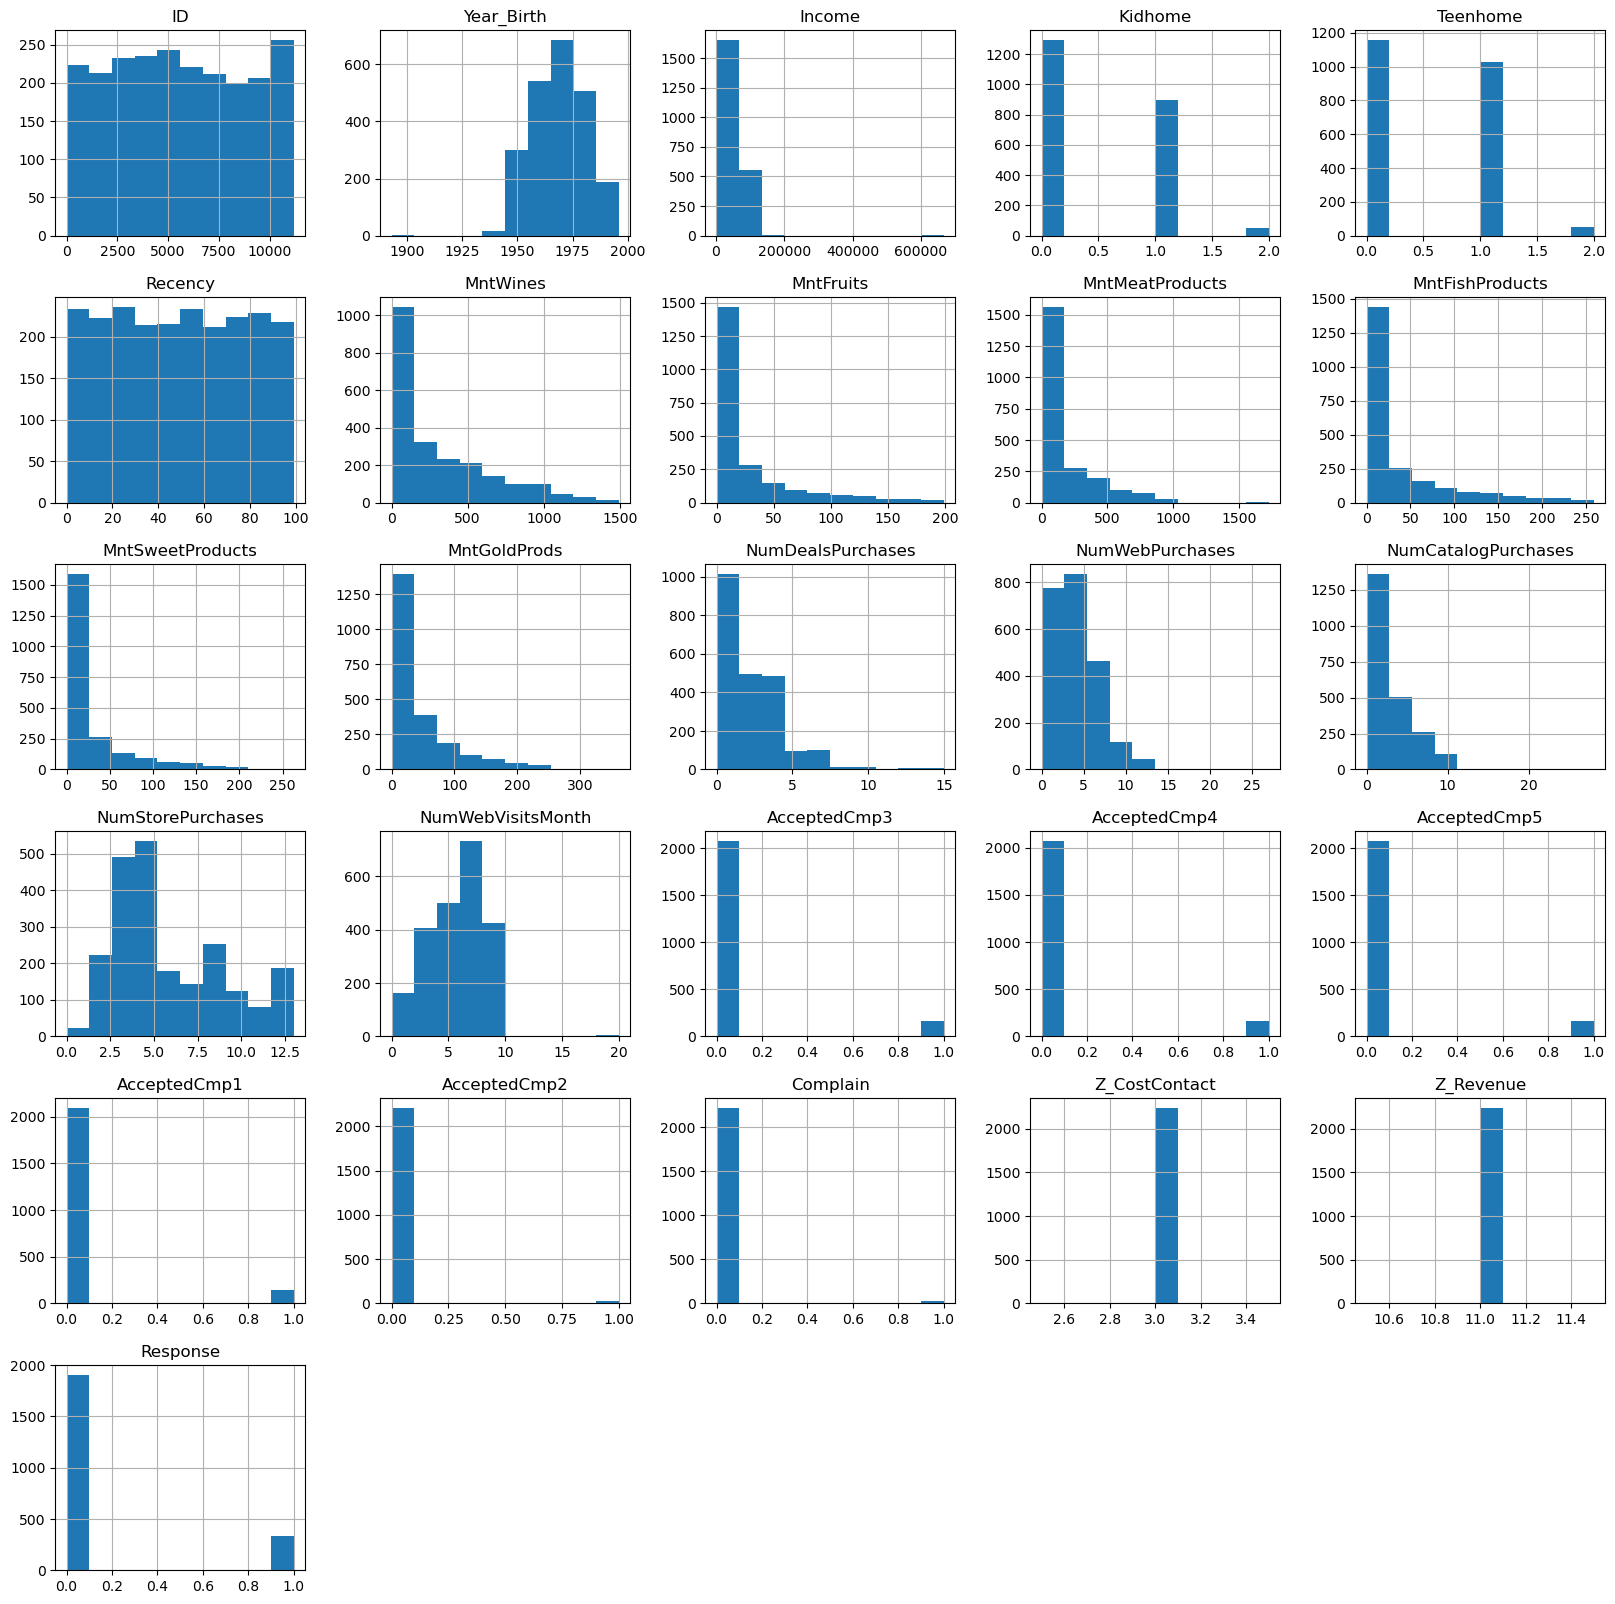

In [384]:
# Histogram
df.hist(figsize=(20,20))
plt.show()

The histogram of this dataset reveals that most of the data doesn't follow a normal distribution. This means the data points aren't evenly spread around the mean in a symmetrical pattern. Recognizing this helps in choosing suitable analysis methods and understanding the data's behavior better.

In [385]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are missing data within the 'Income' column, this will be removed if it is deemed to be an insignificant amount compared to the entire dataset.

In [386]:
# Checking what percentage the columns with missing values occupies within the dataset
df.isna().sum()['Income']/len(df)*100

1.0719071013845467

Since the missing values only cover 1% of the dataset, we will drop them.

In [387]:
df = df.dropna()
df.shape

(2215, 29)

In [388]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012 00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014 00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013 00:00,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014 00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014 00:00,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013 00:00,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014 00:00,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014 00:00,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014 00:00,8,428,...,3,0,0,0,0,0,0,3,11,0


After droping datas with missing values, the index needs to be reset in order to have proper numbering

In [389]:
df.reset_index(inplace=True)

In [390]:
df

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012 00:00,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014 00:00,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013 00:00,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014 00:00,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014 00:00,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013 00:00,46,...,5,0,0,0,0,0,0,3,11,0
2211,2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014 00:00,56,...,7,0,0,0,1,0,0,3,11,0
2212,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014 00:00,91,...,6,0,1,0,0,0,0,3,11,0
2213,2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014 00:00,8,...,3,0,0,0,0,0,0,3,11,0


Dropping the Excess index column.

In [391]:
df.drop(columns='index', inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012 00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014 00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013 00:00,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014 00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014 00:00,94,173,...,5,0,0,0,0,0,0,3,11,0


In [392]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates within the dataset.

In [393]:
df.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace=True)

Dropping the 'Z_CostContact' and 'Z_Revenue' as there are no context to what they are.

# **Data Correction and Categorizing**

First we will correct the data type of Dt_customer as it should be in date time instead of object.

In [394]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d/%m/%Y %H:%M')
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2215 entries, 0 to 2214
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2215 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.4 KB


Dt_Customer's data type has been corrected to datetime successfully.

In [395]:
df.sort_values(by = 'Dt_Customer', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
975,453,1956,PhD,Widow,35340.0,1,1,2014-06-29,1,27,...,0,3,5,0,0,0,0,0,0,0
189,7300,1952,Graduation,Divorced,69142.0,0,1,2014-06-29,50,448,...,1,7,5,0,1,0,0,0,0,0
782,6722,1954,PhD,Married,70421.0,0,1,2014-06-28,98,479,...,3,7,6,0,0,0,0,0,0,0
1794,8093,1969,Master,Married,79734.0,0,0,2014-06-28,72,572,...,3,6,1,0,0,0,1,0,0,0
42,1371,1976,Graduation,Single,79941.0,0,0,2014-06-28,72,123,...,4,9,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,2611,1959,Master,Together,82576.0,0,0,2012-08-01,66,1206,...,4,12,1,0,0,1,0,0,0,0
2011,10001,1985,2n Cycle,Together,7500.0,1,0,2012-08-01,98,5,...,1,3,9,0,0,0,0,0,0,0
710,4692,1976,Graduation,Married,7500.0,1,0,2012-08-01,19,7,...,1,2,9,1,0,0,0,0,0,1
1349,6181,1950,2n Cycle,Together,52203.0,0,0,2012-07-31,36,488,...,7,11,6,0,0,0,0,0,0,0


Now, we will add a new column named "Age" based on the 'Year_Birth' column, in order to be able to see our age customer's age range.

In [396]:
df.insert(2, column="Age", value=2014-df['Year_Birth'])
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,57,Graduation,Single,58138.0,0,0,2012-09-04,58,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,60,Graduation,Single,46344.0,1,1,2014-03-08,38,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,49,Graduation,Together,71613.0,0,0,2013-08-21,26,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,30,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,33,PhD,Married,58293.0,1,0,2014-01-19,94,...,3,6,5,0,0,0,0,0,0,0


In [397]:
df_age = df['Age']
df_age.describe()

count    2215.000000
mean       45.186907
std        11.983326
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

After successfully making the new 'Age' column and seeing its brief description, we can see that there is a clear outlier in which someone is 121 years old (max value), this will be addressed and dealt with later on.

We will also categorize age ranges based on the common knowledge in which that they are usually categorized, and add them to the dataset:

1. Toddlers (5 years old or less)
2. Children (6 - 11 years old)
3. Teenagers (12 - 17 years old)
4. Young Adults (18 - 26 years old)
5. Adults (27 - 44 years old)
6. Middle Age (45 - 64 years old)
6. Elderly (65 or older)

based on the following reference: [link](https://pubmed.ncbi.nlm.nih.gov/7203662/#:~:text=The%20stages%20of%20adulthood%20examined,(ages%2065%20and%20older).)

In [398]:
# Create Grouping for Age Category 

def agecategory(x):
    if x <= 5:
        return 'Toddler'
    elif x <= 11:
        return 'Children'
    elif x <= 17 :
        return 'Teenage'
    elif x <= 26:
        return 'Young Adult'
    elif x <= 44 :
        return 'Adult'
    elif x <= 64:
        return 'Middle Age'
    else:
        return 'Elderly'
    
df.insert(3, column='Age_Category', value=df['Age'].apply(agecategory))

df.head ()

,ID,Year_Birth,Age,Age_Category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,57,Middle Age,Graduation,Single,58138.0,0,0,2012-09-04,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,60,Middle Age,Graduation,Single,46344.0,1,1,2014-03-08,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,49,Middle Age,Graduation,Together,71613.0,0,0,2013-08-21,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,30,Adult,Graduation,Together,26646.0,1,0,2014-02-10,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,33,Adult,PhD,Married,58293.0,1,0,2014-01-19,...,3,6,5,0,0,0,0,0,0,0


In [399]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

There are also oddities within the 'Marital_Status' column, we will replace the following data with 'Single':

- YOLO
- Absurd
- Alone

In [400]:
replace_values= {
                'YOLO' : 'Single',
                'Absurd' : 'Single',
                'Alone' : 'Single'
}

df['Marital_Status'].replace(replace_values, inplace=True)

In [401]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

We will also change the '2n Cycle' data in the Education column to 'Masters' based on the following reference:
[link](https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/#:~:text=The%20first%20cycle%20is%20for,doctoral%20or%20PhD%20level%20studies.)

In [402]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [403]:
df['Education'].replace({'2n Cycle':'Master'}, inplace=True)

In [404]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

# **Checking and Handling Outliers**

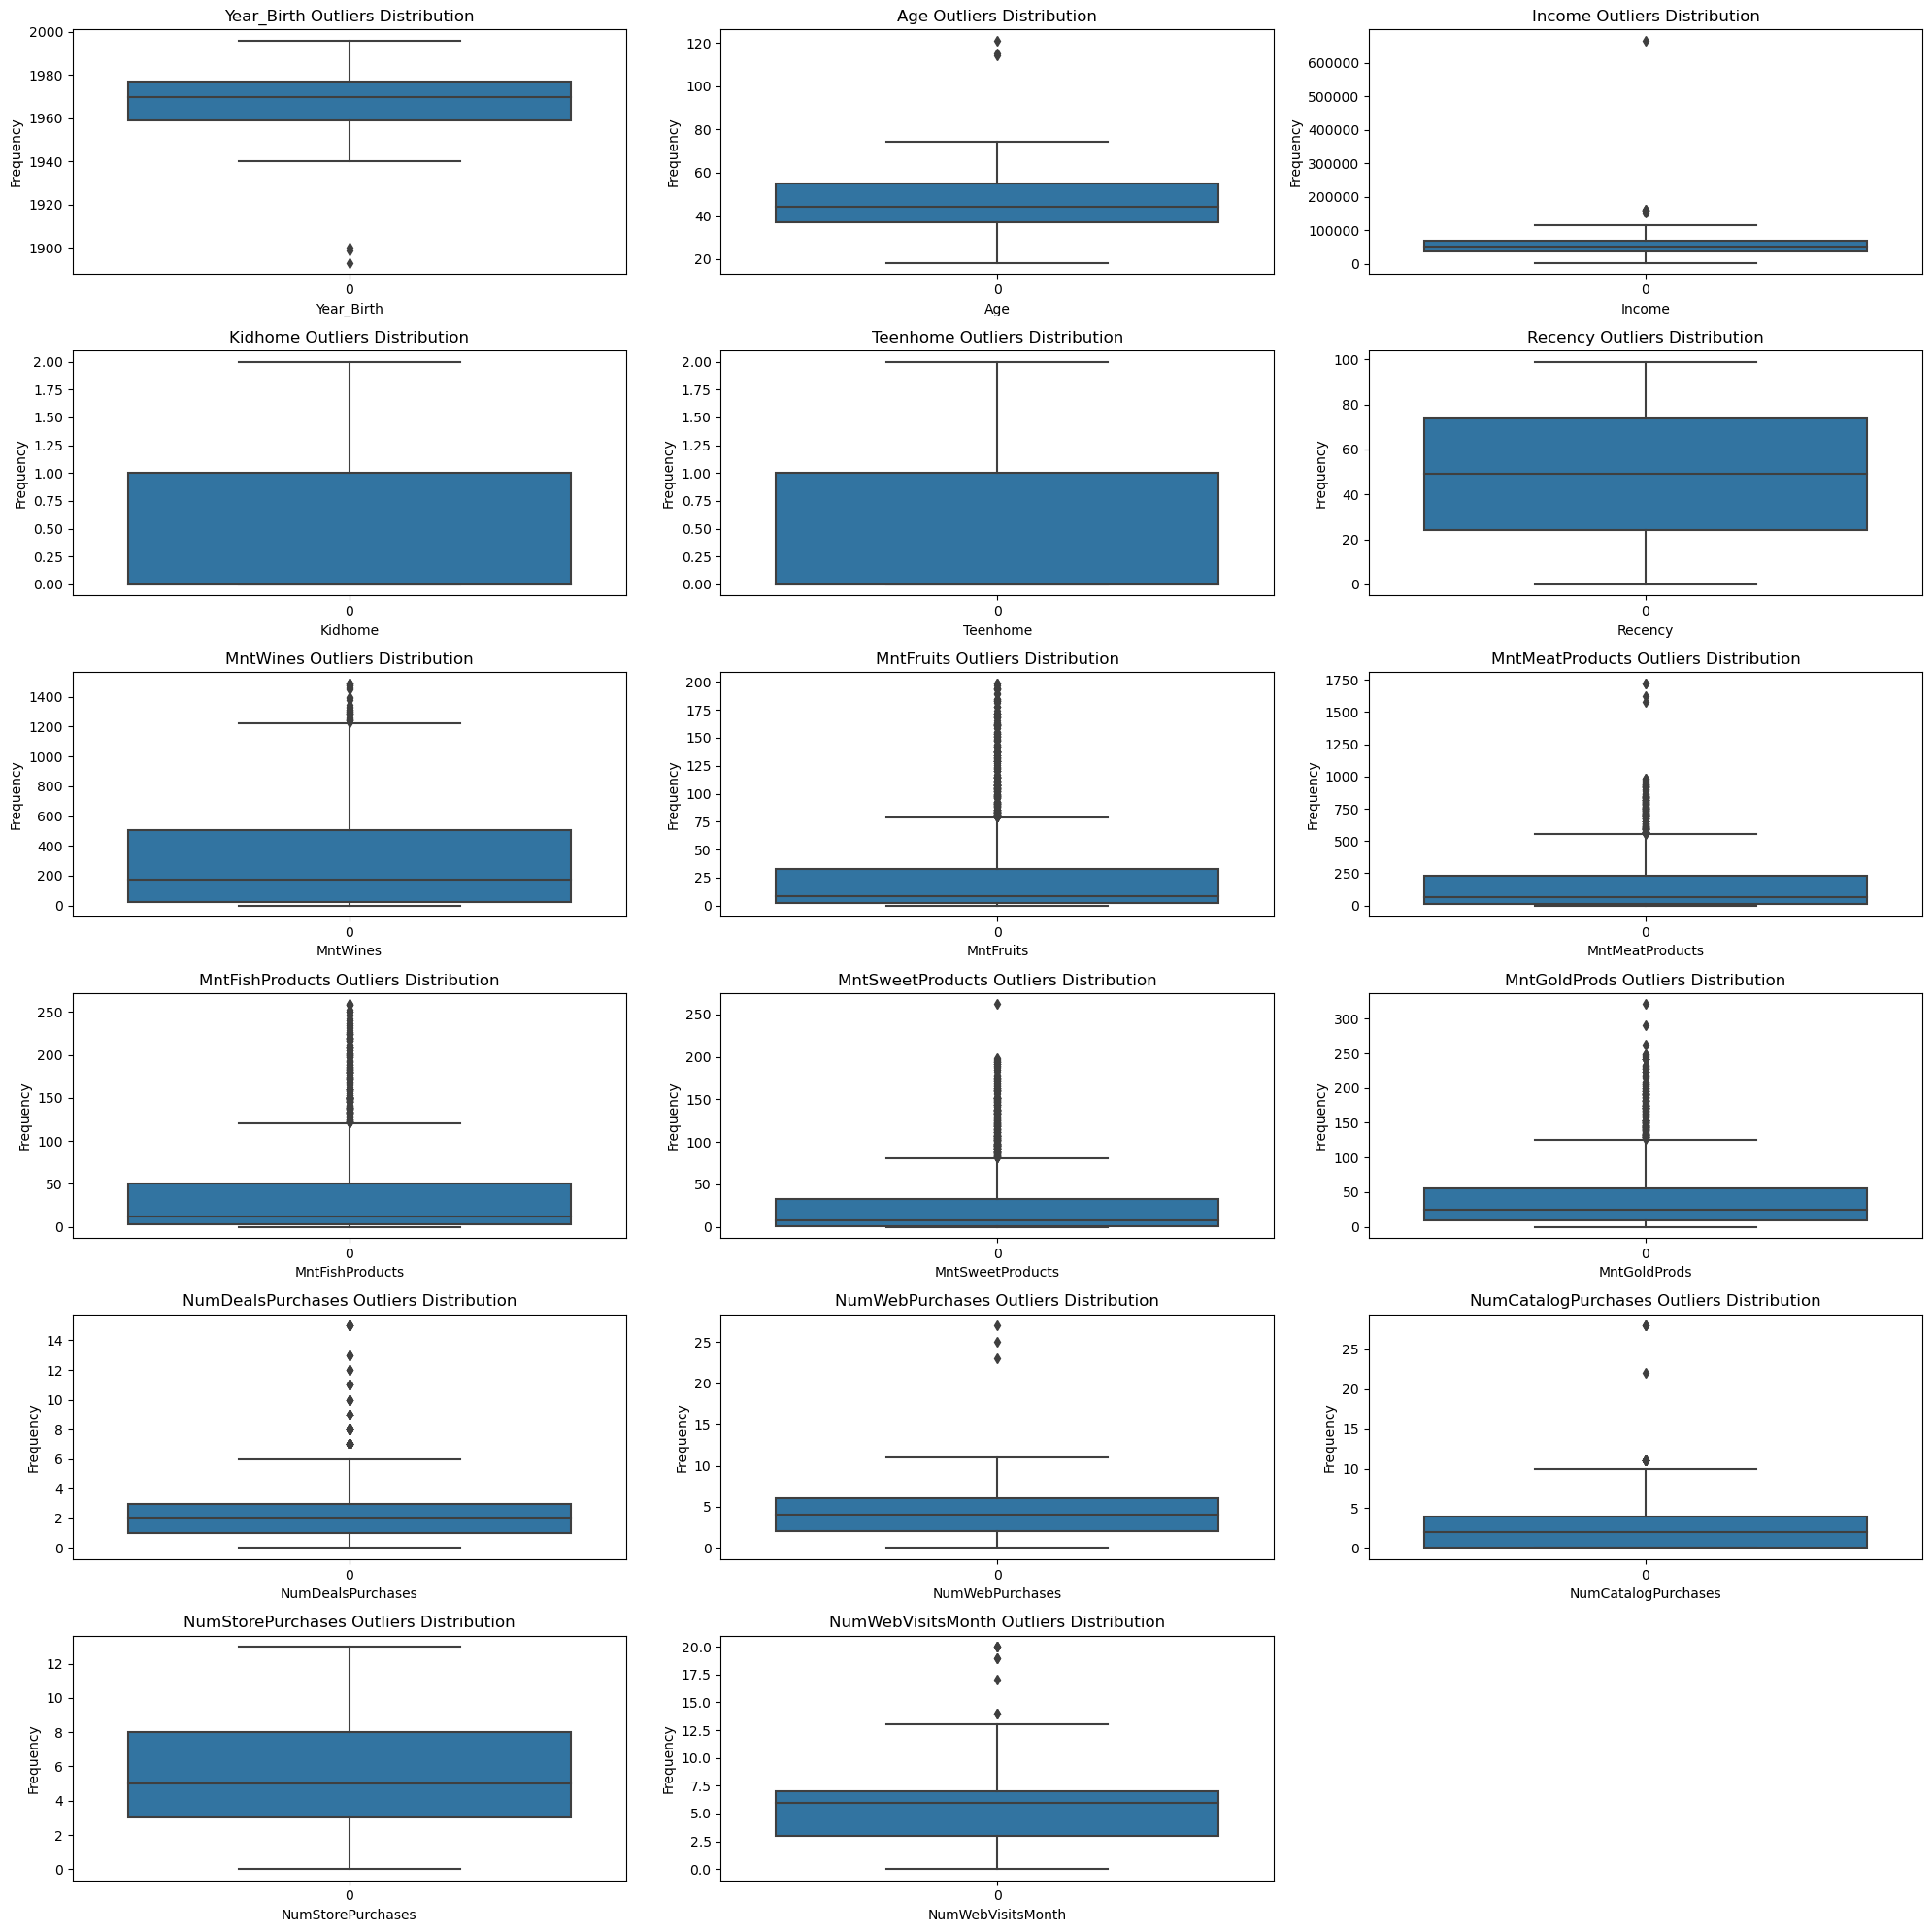

In [405]:
columns = ['Year_Birth', 'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
           'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
           'NumStorePurchases', 'NumWebVisitsMonth']

fig = plt.figure(figsize=(20, 20))

for i, col in enumerate(columns, start=1):
    plt.subplot(6, 3, i)
    sns.boxplot(df[col])
    plt.title(f'{col} Outliers Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the boxplot check, there are varying amounts of outliers in each column. We will focus on the columns that have small amounts of outliers and check if they are able to be dropped.

We will use the z-score method to determine how many outliers there are in selected columns, and if there is a significant amount.

In [406]:
# Selecting which columns to check
columns_to_check = ['Year_Birth', 'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
                   'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                   'NumStorePurchases', 'NumWebVisitsMonth']

# Calculate Z-scores for specified columns
z_scores = np.abs((df[columns_to_check] - df[columns_to_check].mean()) / df[columns_to_check].std())

# Define threshold for outliers (e.g., beyond 3 standard deviations)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Count rows with outliers
rows_with_outliers = df[outliers].index

# Calculate percentage of rows with outliers
percentage_rows_with_outliers = (len(rows_with_outliers) / len(df)) * 100

print(f"Total rows with outliers: {len(rows_with_outliers)}")
print(f"Total rows in DataFrame: {len(df)}")
print(f"Percentage of rows with outliers: {percentage_rows_with_outliers:.2f}%")

Total rows with outliers: 262
Total rows in DataFrame: 2215
Percentage of rows with outliers: 11.83%


With outliers covering 11.83% of the overall data rows, their presence signals potential data irregularities or extreme values that could distort the analysis. Dropping these outliers will be good for preserving data integrity, as they can bias statistical measures. By removing outliers, the dataset's interpretability is enhanced, facilitating clearer insights into underlying relationships and ensuring that analytical assumptions are met. Ultimately, eliminating outliers improves the reliability, accuracy, and interpretability of the analysis, empowering more informed decision-making processes.

In [407]:

columns_to_check = ['Year_Birth', 'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
                   'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                   'NumStorePurchases', 'NumWebVisitsMonth']

# Calculate Z-scores for specified columns
z_scores = np.abs((df[columns_to_check] - df[columns_to_check].mean()) / df[columns_to_check].std())

# Define threshold for outliers (e.g., beyond 3 standard deviations)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Drop outliers from the DataFrame
df_no_outliers = df.drop(df.index[outliers])

# Print the shape of the DataFrame before and after dropping outliers
print("Shape of DataFrame before dropping outliers:", df.shape)
print("Shape of DataFrame after dropping outliers:", df_no_outliers.shape)

Shape of DataFrame before dropping outliers: (2215, 29)
Shape of DataFrame after dropping outliers: (1953, 29)


**Resetting the index for proper numbering of rows**

In [408]:
df_no_outliers.reset_index(inplace = True)
df_no_outliers

,index,ID,Year_Birth,Age,Age_Category,Education,Marital_Status,Income,Kidhome,Teenhome,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,57,Middle Age,Graduation,Single,58138.0,0,0,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,60,Middle Age,Graduation,Single,46344.0,1,1,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,49,Middle Age,Graduation,Together,71613.0,0,0,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,30,Adult,Graduation,Together,26646.0,1,0,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,33,Adult,PhD,Married,58293.0,1,0,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,2209,8372,1974,40,Adult,Graduation,Married,34421.0,1,0,...,0,2,7,0,0,0,0,0,0,0
1949,2211,4001,1946,68,Elderly,PhD,Together,64014.0,2,1,...,2,5,7,0,0,0,1,0,0,0
1950,2212,7270,1981,33,Adult,Graduation,Divorced,56981.0,0,0,...,3,13,6,0,1,0,0,0,0,0
1951,2213,8235,1956,58,Middle Age,Master,Together,69245.0,0,1,...,5,10,3,0,0,0,0,0,0,0


In [409]:
df_no_outliers.drop(columns = 'index', inplace=True)

In [410]:
df_no_outliers

,ID,Year_Birth,Age,Age_Category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,57,Middle Age,Graduation,Single,58138.0,0,0,2012-09-04,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,60,Middle Age,Graduation,Single,46344.0,1,1,2014-03-08,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,49,Middle Age,Graduation,Together,71613.0,0,0,2013-08-21,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,30,Adult,Graduation,Together,26646.0,1,0,2014-02-10,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,33,Adult,PhD,Married,58293.0,1,0,2014-01-19,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,8372,1974,40,Adult,Graduation,Married,34421.0,1,0,2013-07-01,...,0,2,7,0,0,0,0,0,0,0
1949,4001,1946,68,Elderly,PhD,Together,64014.0,2,1,2014-06-10,...,2,5,7,0,0,0,1,0,0,0
1950,7270,1981,33,Adult,Graduation,Divorced,56981.0,0,0,2014-01-25,...,3,13,6,0,1,0,0,0,0,0
1951,8235,1956,58,Middle Age,Master,Together,69245.0,0,1,2014-01-24,...,5,10,3,0,0,0,0,0,0,0


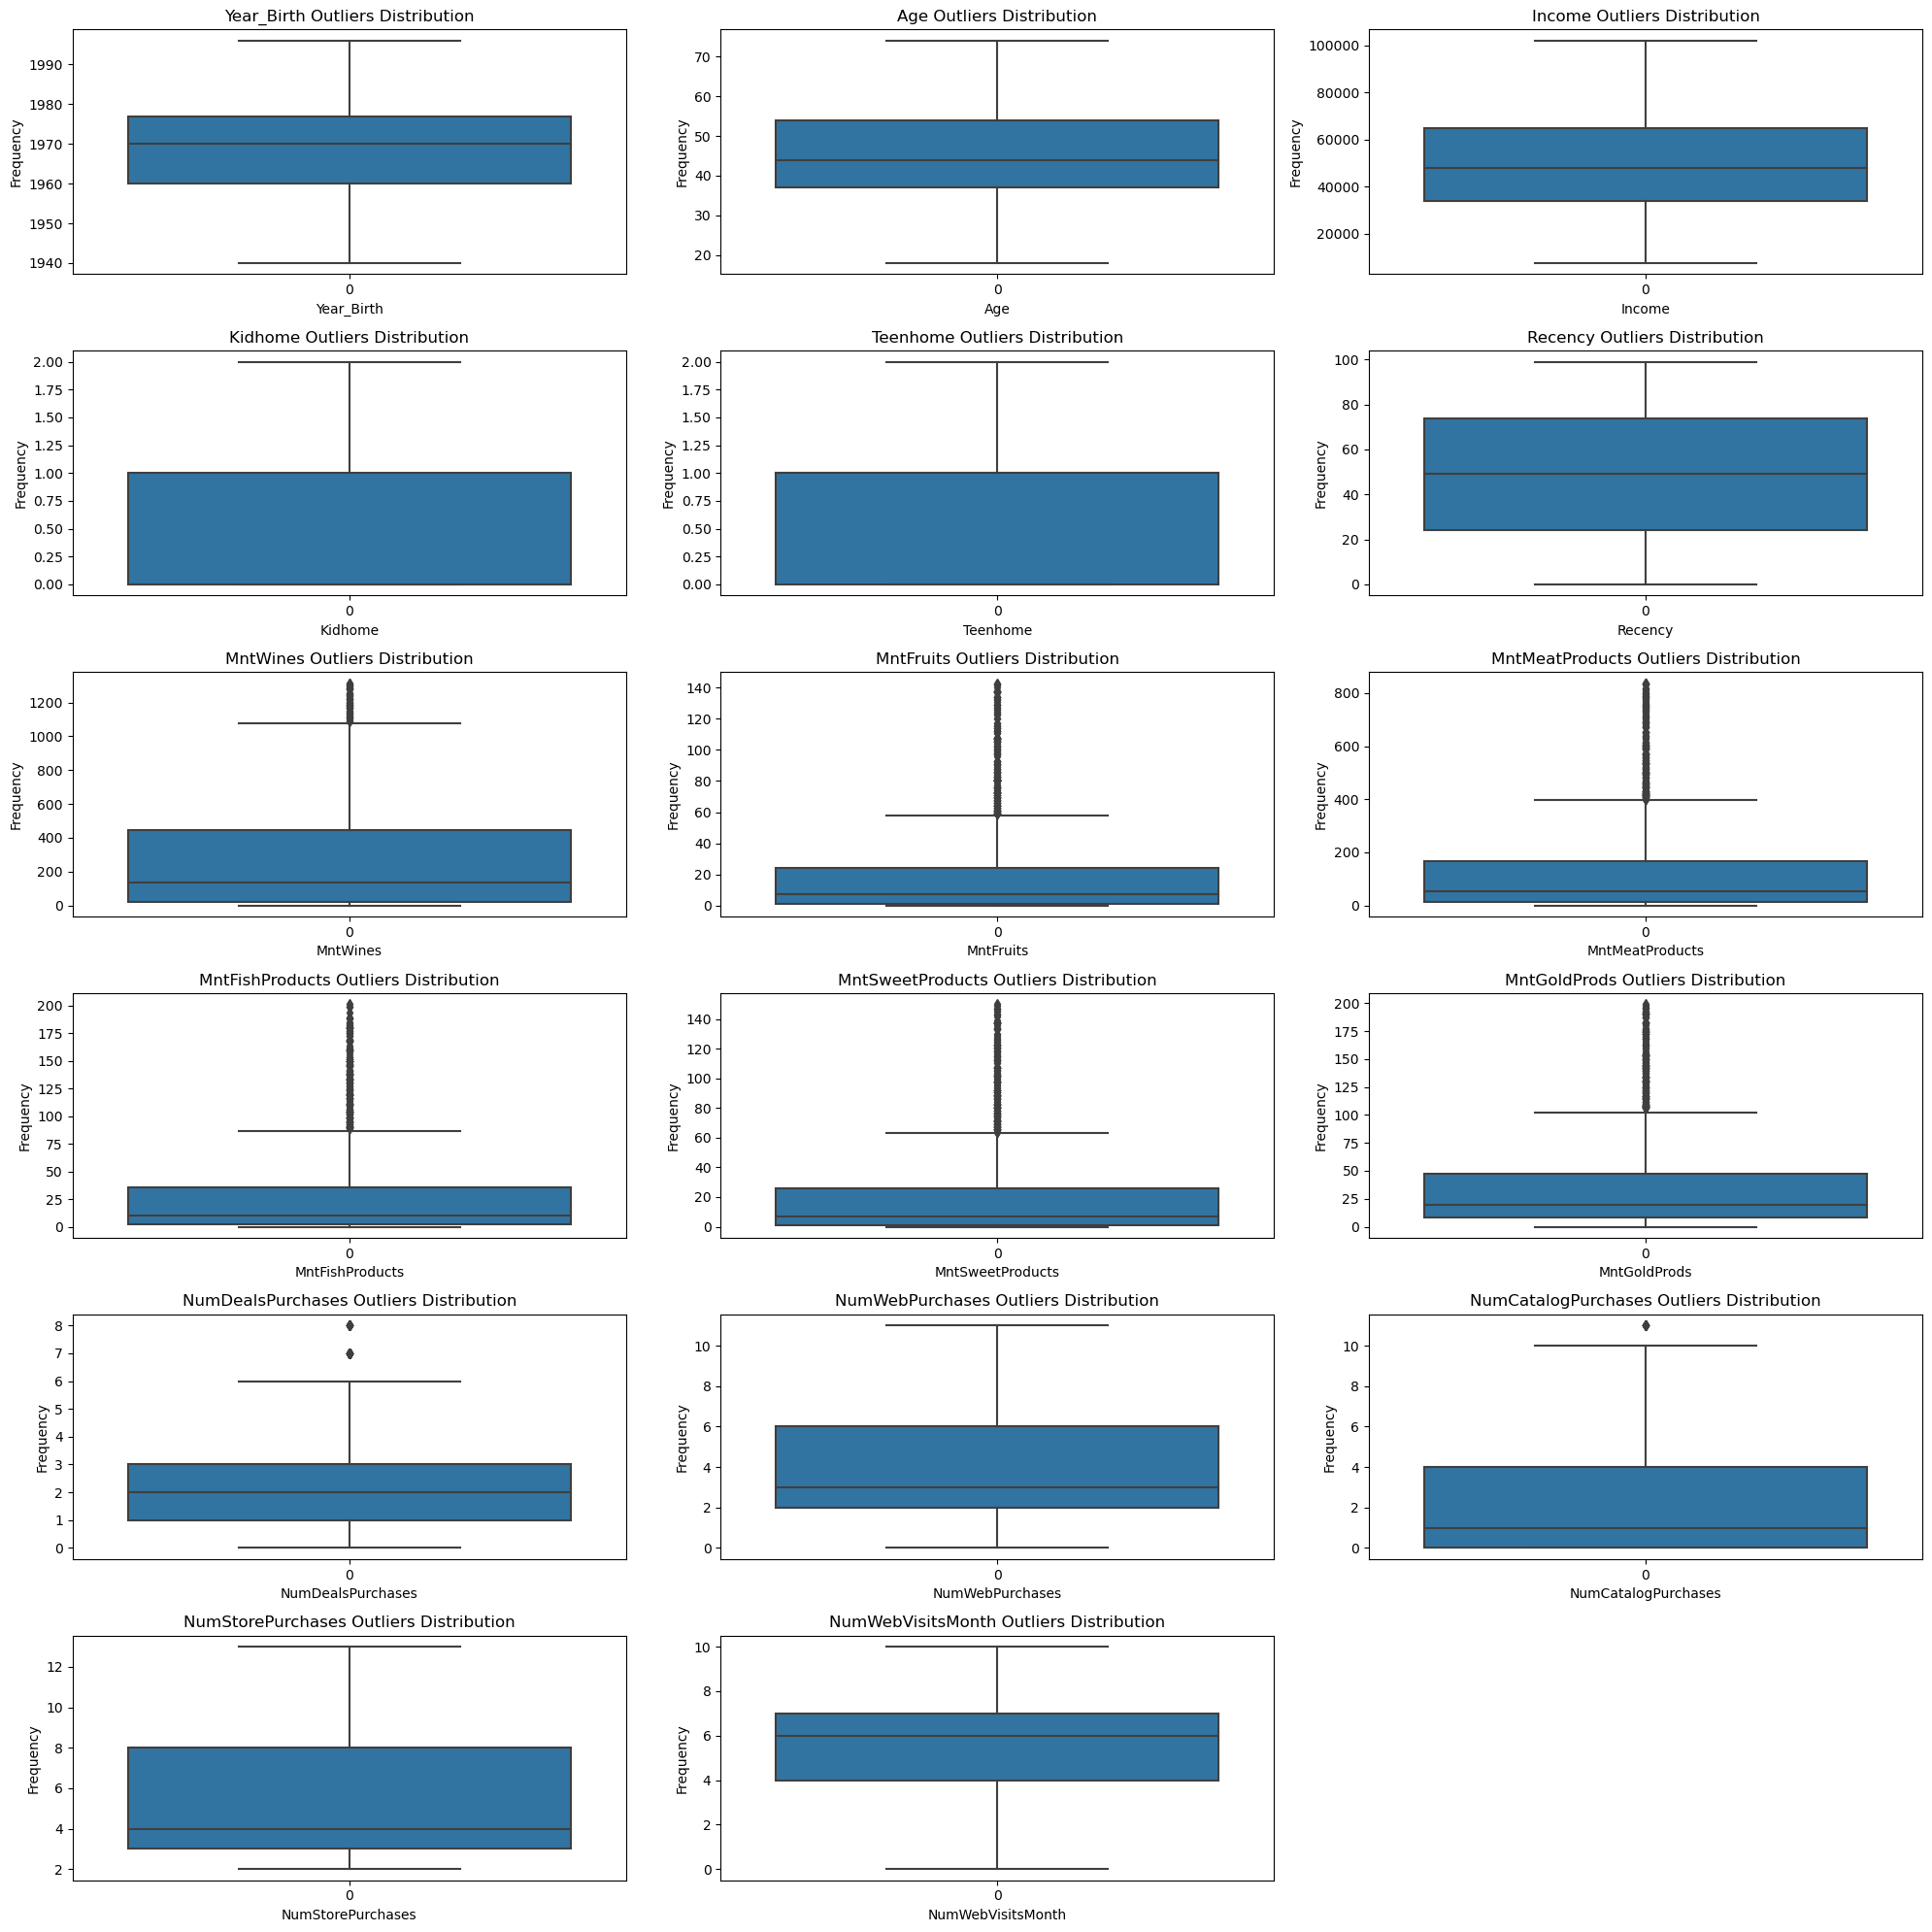

In [411]:
columns = ['Year_Birth', 'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
           'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
           'NumStorePurchases', 'NumWebVisitsMonth']

fig = plt.figure(figsize=(20, 20))

for i, col in enumerate(columns, start=1):
    plt.subplot(6, 3, i)
    sns.boxplot(df_no_outliers[col])
    plt.title(f'{col} Outliers Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **EDA (Exploratory Data Analysis)**

Now that the data has been cleaned, we can explore said data with the following as context for each columns:

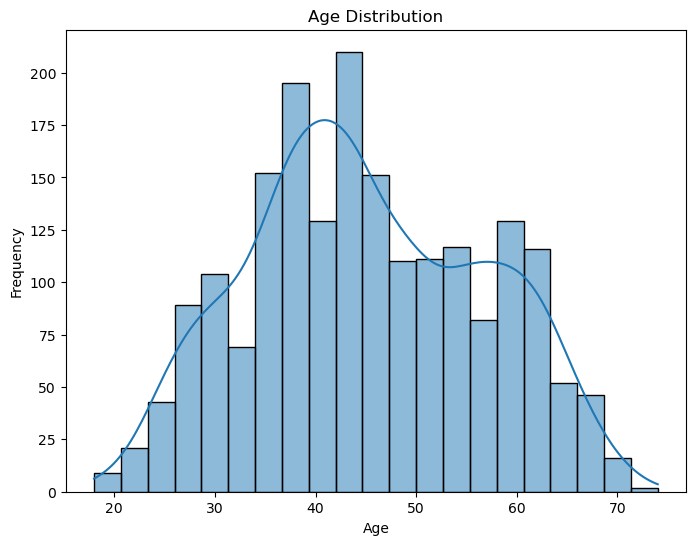

In [412]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_no_outliers['Age'], kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

The age range of the customer base is distributed normally.

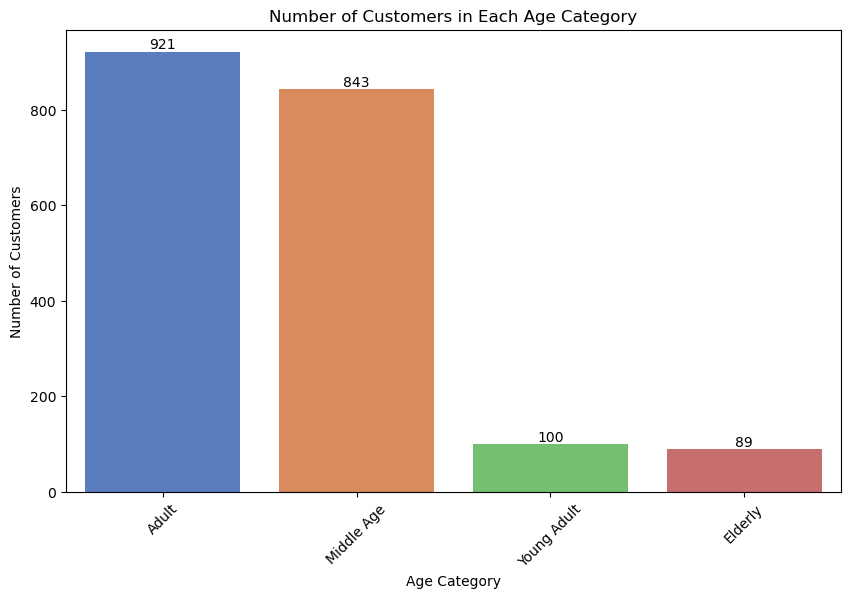

In [413]:
# Count the number of customers in each age category
age_category_counts = df_no_outliers['Age_Category'].value_counts()

# Plot the counts of customers in each age category
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=age_category_counts.index, y=age_category_counts.values, palette='muted')
plt.title('Number of Customers in Each Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Add values on top of each bar
for index, value in enumerate(age_category_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

The store is very popular with adults and middle aged people, but not so much with young adults and the elderly. perhaps there is a need to make campaigns or push products that appeal to these age categories.

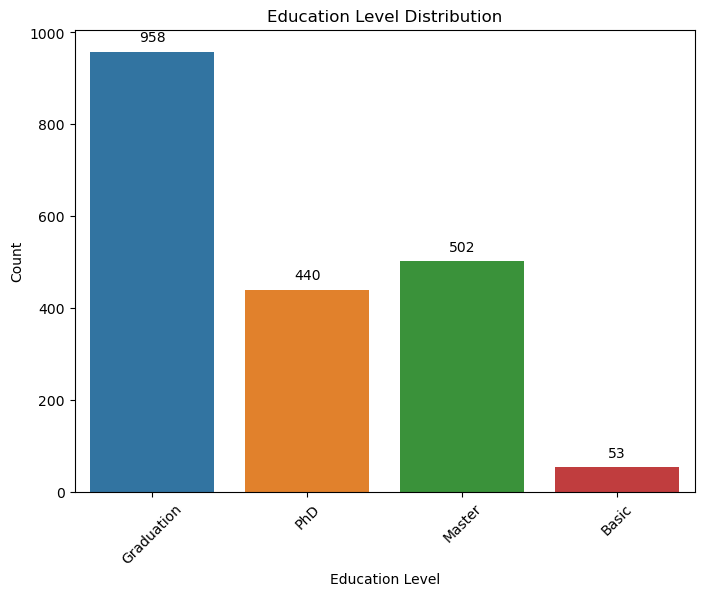

In [414]:
# Education distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_no_outliers, x='Education')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

Within the customer base there are more of those who have Graduate level education, with Masters and PhD level of education customers each trailing by about half the amount.

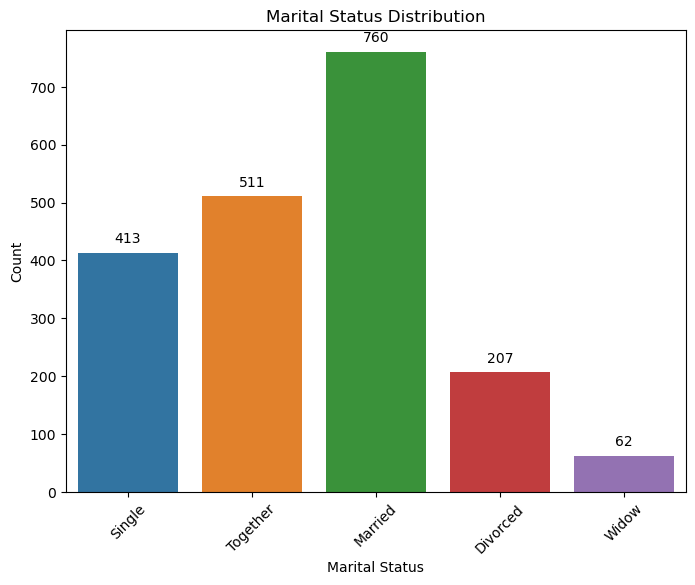

In [415]:
# Marital status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_no_outliers, x='Marital_Status')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

The store is very popular with couples judging by the amount of customers that have 'Together' or 'Married' as their statuses, a promotional campaign focused on couple themes could be very popular moving forward.

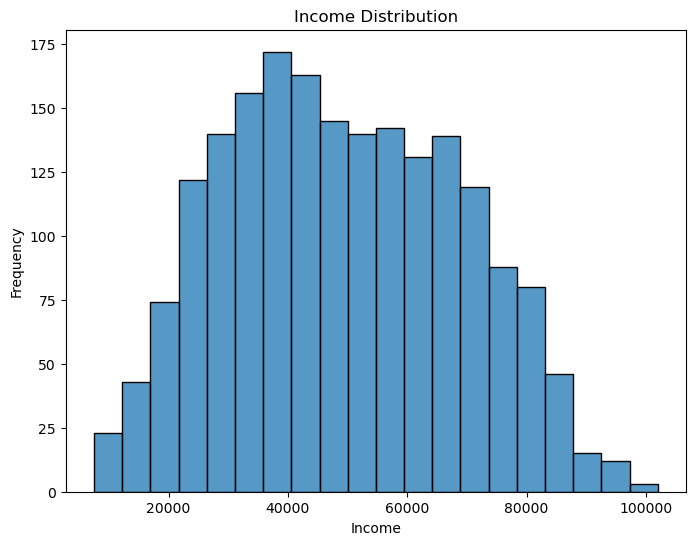

In [416]:
# Income distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_no_outliers['Income'])
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The distribution of income is normally distributed.

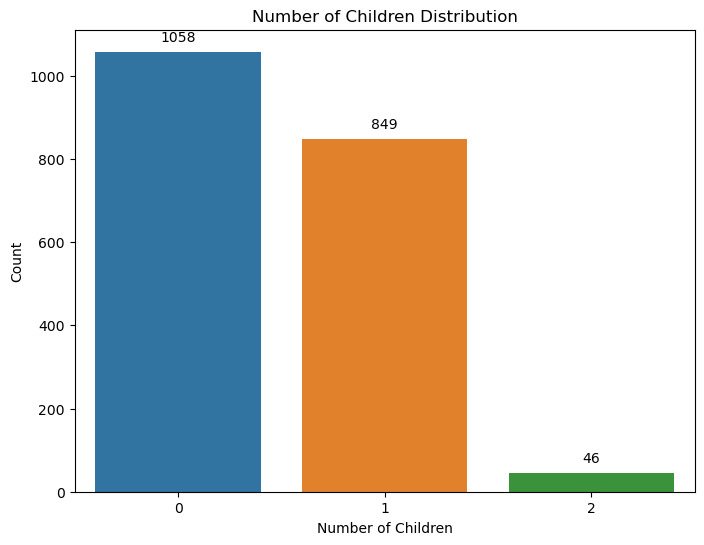

In [417]:
# Number of children distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_no_outliers, x='Kidhome')
plt.title('Number of Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

The store has quite a lot of customers who either have no children or only have one child, perhaps there are conversations to be had to bring in customers who have more children.

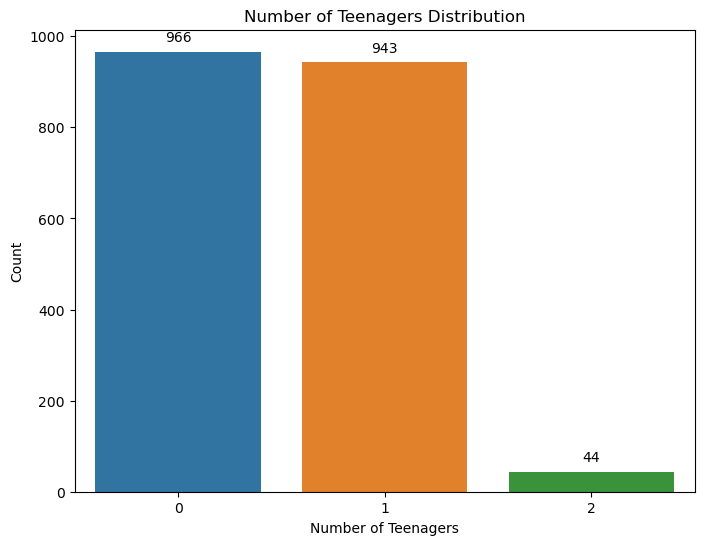

In [418]:
# Number of teenagers distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_no_outliers, x='Teenhome')
plt.title('Number of Teenagers Distribution')
plt.xlabel('Number of Teenagers')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

Just like the data with number of children, while the customer base is bustling with those who have no children or just one child, there are more that can likely be done to attract customers who have 2 or more teens in their household.

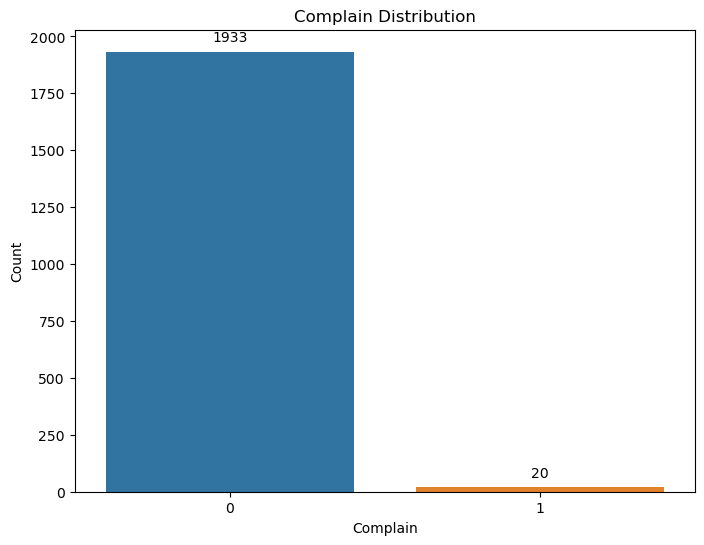

In [419]:
# Complaint distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_no_outliers, x='Complain')
plt.title('Complain Distribution')
plt.xlabel('Complain')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

Based on the data, there are very few customers that file complaints. This is a very good indication on customer satisfaction of the service and or the product pricing of our store.

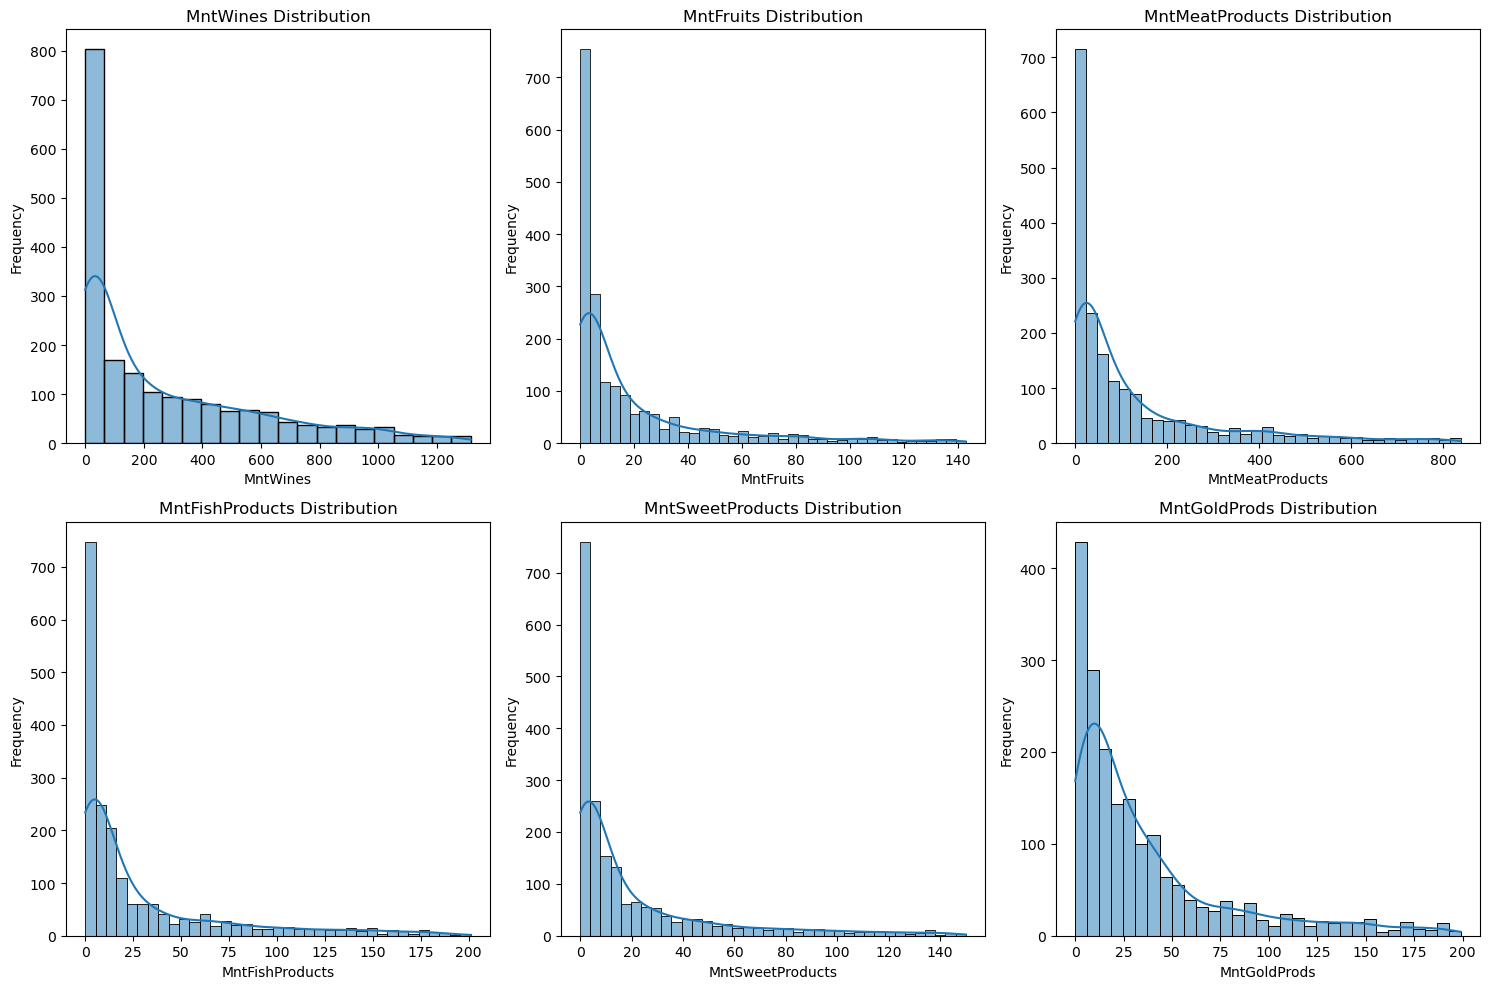

In [420]:
purchase_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig = plt.figure(figsize=(15, 10))

for i, col in enumerate(purchase_cols, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df_no_outliers[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The data pertaining to the amounts spent on various products exhibits a non-normal distribution, notably skewed towards the right. This right-skewed distribution suggests that while there is variability in the spending patterns across different products, there exists a significant portion of customers who spend relatively small amounts on these items, with fewer customers making larger expenditures. This skewness implies that the majority of customers tend to spend modestly on these products, while a minority may exhibit more extravagant spending habits. Understanding this distribution is crucial for targeted marketing strategies and product positioning, as it provides insights into consumer behavior and preferences, allowing businesses to tailor their approaches accordingly to better serve their customer base and maximize revenue.

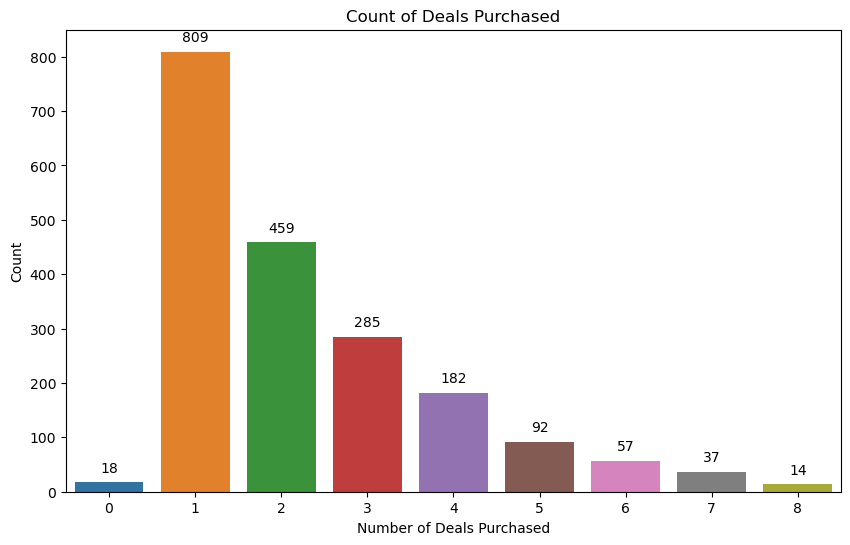

In [421]:
# Promotion and Response
sorted_df = df_no_outliers['NumDealsPurchases'].value_counts().reset_index()
sorted_df = sorted_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x='NumDealsPurchases', y='count')
plt.title('Count of Deals Purchased')
plt.xlabel('Number of Deals Purchased')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')
    
plt.show()

Based on the graph above, more often than not customers purchase products with deals on them, with the most amoutn of customers having done 1 purchase with a deal.

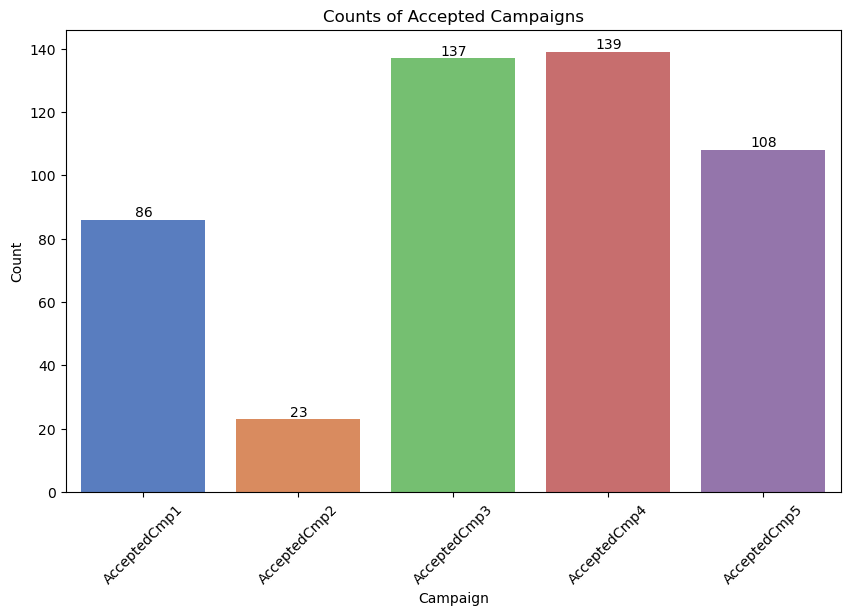

In [422]:

# Filter DataFrame to include only rows where the campaign columns have a value of 1
accepted_campaigns_df = df_no_outliers[df_no_outliers[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].eq(1).any(axis=1)]

# Get counts of each campaign
campaign_counts = accepted_campaigns_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

# Plot the counts of accepted campaigns
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=campaign_counts.index, y=campaign_counts.values, palette='muted')
plt.title('Counts of Accepted Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add values on top of each bar
for index, value in enumerate(campaign_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

While all the campaigns done so far has been received decently well with more than 100 customers accepting said campaigns, more research needs to be done on why campaign 2 is very poorly received. There is a lack of context within the data to conclude as to why campaign 2 performed the way that it did.

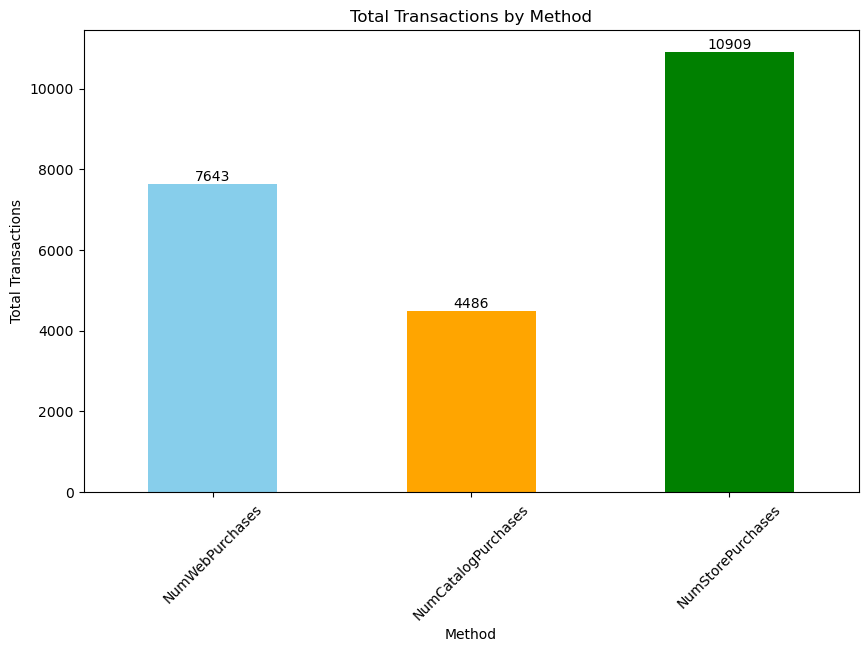

In [423]:
# Calculate total transactions from each method
total_transactions = df_no_outliers[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Plot the total transactions from each method
plt.figure(figsize=(10, 6))
barplot = total_transactions.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Total Transactions by Method')
plt.xlabel('Method')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)

# Add values on top of each bar
for index, value in enumerate(total_transactions):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

Most customer purchases are made in store, with online transactions following right behind, and catalogue purchases in last place.

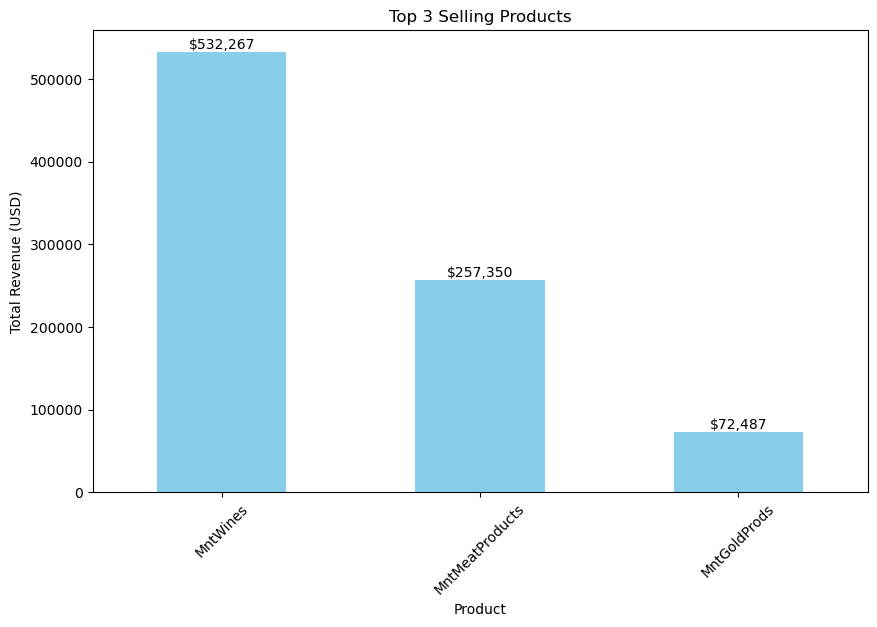

In [424]:
# Calculate total amount sold for each product
products_sold = df_no_outliers[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Sort the products by total amount sold
products_sold_sorted = products_sold.sort_values(ascending=False)

# Get the top 3 selling products
top_3_products = products_sold_sorted.head(3)

# Plot the top 3 selling products
plt.figure(figsize=(10, 6))
top_3_products.plot(kind='bar', color='skyblue')
plt.title('Top 3 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)

# Add values on top of each bar
for index, value in enumerate(top_3_products):
    plt.text(index, value, '${:,.0f}'.format(value), ha='center', va='bottom')

plt.show()

From the graph above, we can see that Wine and Meat products are our highest source of revenue by quite the margin even compared to the 3rd best seller which is Gold products. This means it is safe to keep Wine and Meat products restocked and bring more eyes to them via promotional campaigns for the foreseeable future, the same can also be said for Gold products, albeit to a much lesser degree than the other 2.

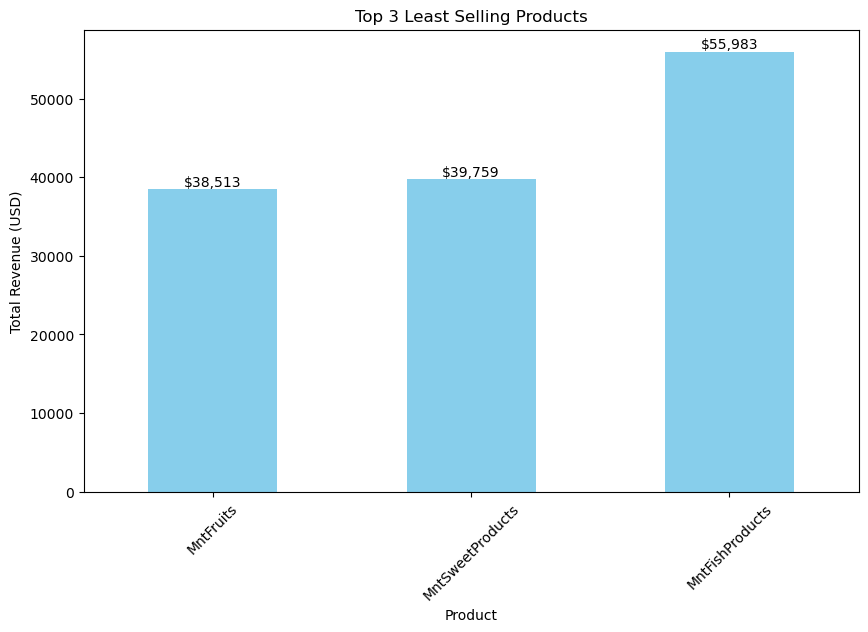

In [425]:
# Calculate total amount sold for each product
products_sold = df_no_outliers[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Sort the products by total amount sold in ascending order to find least selling products
products_sold_sorted = products_sold.sort_values()

# Get the top 3 least selling products
top_3_least_selling_products = products_sold_sorted.head(3)

# Plot the top 3 least selling products
plt.figure(figsize=(10, 6))
barplot = top_3_least_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top 3 Least Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)

# Add values on top of each bar
for index, value in enumerate(top_3_least_selling_products):
    plt.text(index, value, '${:,.0f}'.format(value), ha='center', va='bottom')

plt.show()

While fish products dont fall behind too much, the same cannot be said about our sweets and fruits products. Reconsideration is needed on whether or not it is worth it to keep these products restocked, or how we can sell them more effectively.

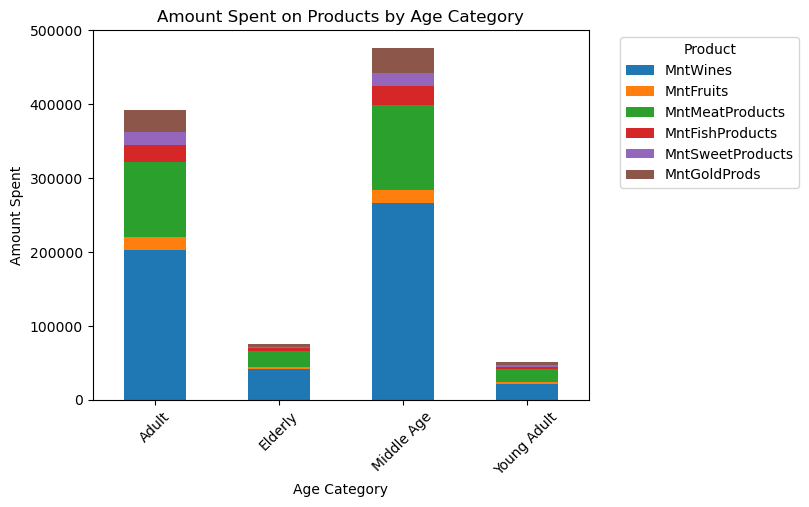

In [426]:
product_rev_by_age = df_no_outliers.groupby('Age_Category')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Plot the mean amount spent on each product category for each age group

product_rev_by_age.plot(kind='bar', stacked=True)
plt.title('Amount Spent on Products by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Based on the graph above, we can see that no matter the age category, Wines and Meats are our best sellers with said products having the highest average amount spent in each category.

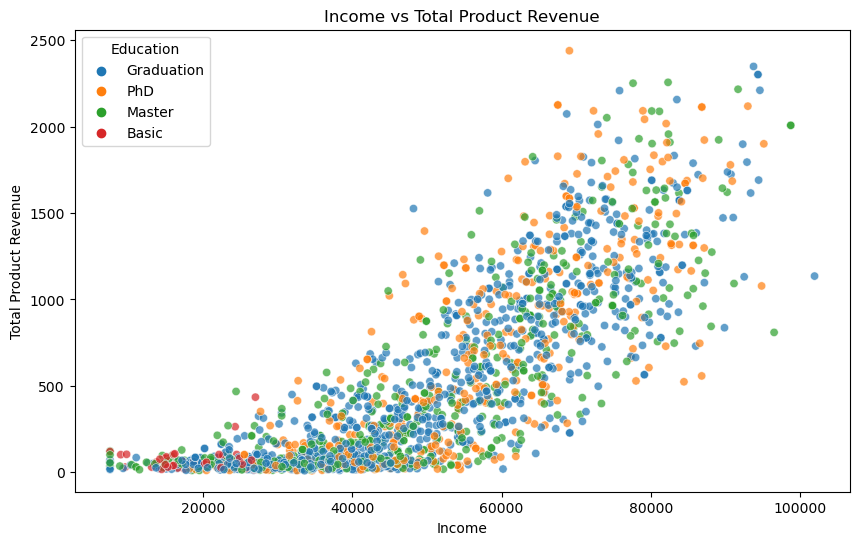

In [438]:
# Create total products bought column
df_no_outliers['Total_Product_Revenue'] = df_no_outliers[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Plot income vs total amount of products bought
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='Income', y='Total_Product_Revenue', hue = 'Education', alpha=0.7)
plt.title('Income vs Total Product Revenue')
plt.xlabel('Income')
plt.ylabel('Total Product Revenue')

plt.show()

The Scatterplot above shows that there is a correlation between a customer household's income and the amount of products bought, the higher the household income the more products they purchase. This graph also shows that while customers with higher levels of education tend to have higher income than those with basic education therefore spending more, it is not an exact point of reference as there are a very wide range of income even in the same education level.

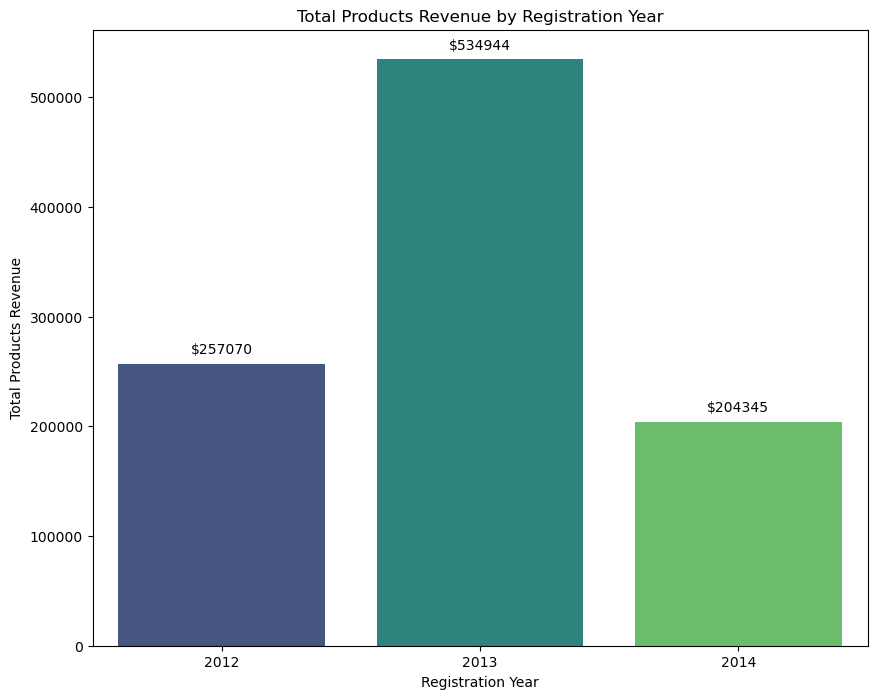

In [437]:
# Create new column for registration year
df_no_outliers['Registration_Year'] = df_no_outliers['Dt_Customer'].dt.year

# Group the DataFrame by registration year and calculate the mean total products bought for each year
mean_products_by_year = df_no_outliers.groupby('Registration_Year')['Total_Product_Revenue'].sum().reset_index()

# Plot the mean total products bought for each registration year
plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=mean_products_by_year, x='Registration_Year', y='Total_Product_Revenue', palette='viridis')

# Add the total amount of products bought on top of each bar
for p in barplot.patches:
    barplot.annotate('$' + format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'bottom', 
                     xytext = (0, 5), 
                     textcoords = 'offset points')

plt.title('Total Products Revenue by Registration Year')
plt.xlabel('Registration Year')
plt.ylabel('Total Products Revenue')

plt.show()

Last but not least, based on the registration year, customers who have registered longer has also bought more products on average. Which means customer loyalty levels are quite good and the store should do our best so that trust can be maintained moving forward.

In [430]:
df_cleaned = df_no_outliers.copy()
df_cleaned.head()

,ID,Year_Birth,Age,Age_Category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Product_Revenue,Registration_Year
0,5524,1957,57,Middle Age,Graduation,Single,58138.0,0,0,2012-09-04,...,7,0,0,0,0,0,0,1,1617,2012
1,2174,1954,60,Middle Age,Graduation,Single,46344.0,1,1,2014-03-08,...,5,0,0,0,0,0,0,0,27,2014
2,4141,1965,49,Middle Age,Graduation,Together,71613.0,0,0,2013-08-21,...,4,0,0,0,0,0,0,0,776,2013
3,6182,1984,30,Adult,Graduation,Together,26646.0,1,0,2014-02-10,...,6,0,0,0,0,0,0,0,53,2014
4,5324,1981,33,Adult,PhD,Married,58293.0,1,0,2014-01-19,...,5,0,0,0,0,0,0,0,422,2014


# **Conclusion:**

In analyzing our supermarket's data, several key insights have emerged that can inform strategic decision-making to drive revenue growth and operational efficiency.

**1. Demographic Influence on Purchasing Patterns:**

The data reveals that the 'Adult' and 'Middle Age' age categories exhibit the highest spending across all product categories, with wine emerging as the most popular product. To incentivize spending among the 'Elderly' and 'Young Adult' categories, targeted marketing strategies could be employed. For instance, personalized discounts or loyalty programs tailored to the preferences of these age groups could encourage higher spending. Additionally, introducing educational events or tastings focusing on products like wine could attract interest and boost sales among these demographics.

**2. Effectiveness of Marketing Campaigns:**

Despite conducting multiple marketing campaigns, there is ambiguity regarding their specifics and timing. Campaign 2 stands out as the least popular among the five campaigns, with generally low customer engagement across all campaigns. Considering the age categories' influence on purchasing behavior, future campaigns could be designed with targeted messaging and timing to resonate better with different age groups. For example, campaigns featuring health-conscious messaging might appeal more to the 'Elderly' category, while campaigns highlighting social events or experiences could attract 'Young Adults'.

**3. Revenue Sources and Product Preferences:**

Wine and meat emerge as the primary revenue drivers, significantly outperforming other product categories such as sweets and fruits. To further capitalize on these revenue streams, the supermarket could explore strategies to enhance the wine and meat offerings. This could include expanding the selection of high-quality wines and meats, offering pairing recommendations, or hosting themed events centered around these products to attract customers and drive sales. Additionally, efforts to improve the presentation and promotion of sweets and fruits could help boost their sales and contribute to overall revenue growth.

In conclusion, by leveraging insights from demographic analysis, optimizing marketing campaigns, and capitalizing on revenue sources, our supermarket can enhance customer engagement, drive revenue growth, and maintain a competitive edge in the market landscape.

In [431]:
df_cleaned.to_csv("Supermarket Customers (Cleaned).csv")